# October 2021 vs. 2022, NEM data Insight for NSW

In this notebook we gain some insight on demand and price changes across 2021 and 2022 for October in NSW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as plticker

In [2]:
# Load Oct 2022 price and total demand data
PriceOCT22 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHPRICE_202210010000\PUBLIC_DVD_DISPATCHPRICE_202210010000.CSV", engine='python',skiprows=1, skipfooter=1)
DEMOCT22 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHREGIONSUM_202210010000\PUBLIC_DVD_DISPATCHREGIONSUM_202210010000.CSV", engine='python',skiprows=1, skipfooter=1)


In [3]:
# Load Oct 2021 price and total demand data
PriceOCT21 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHPRICE_202110010000\PUBLIC_DVD_DISPATCHPRICE_202110010000.CSV", engine='python',skiprows=1, skipfooter=1)
DEMOCT21 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHREGIONSUM_202110010000\PUBLIC_DVD_DISPATCHREGIONSUM_202110010000.CSV", engine='python',skiprows=1, skipfooter=1)


In [4]:
# Keep the fields that we need
col_price = ['SETTLEMENTDATE','REGIONID','RRP']
col_demand = ['SETTLEMENTDATE','REGIONID','TOTALDEMAND']

In [5]:
PriceOCT21 = PriceOCT21[col_price]
PriceOCT22 = PriceOCT22[col_price]

In [6]:
DEMOCT21 = DEMOCT21[col_demand]
DEMOCT22 = DEMOCT22[col_demand]

In [7]:
# Convert settlement date to the date and time formats
PriceOCT21['SETTLEMENTDATE'] = pd.to_datetime(PriceOCT21['SETTLEMENTDATE'])
PriceOCT22['SETTLEMENTDATE'] = pd.to_datetime(PriceOCT22['SETTLEMENTDATE'])
DEMOCT21['SETTLEMENTDATE'] = pd.to_datetime(DEMOCT21['SETTLEMENTDATE'])
DEMOCT22['SETTLEMENTDATE'] = pd.to_datetime(DEMOCT22['SETTLEMENTDATE'])

In [8]:
# Merge the two data set to get the price against demands 
DEM_RRP_OCT_22 = pd.merge(DEMOCT22,PriceOCT22, on = ['SETTLEMENTDATE','REGIONID'], how = 'left')
DEM_RRP_OCT_21 = pd.merge(DEMOCT21,PriceOCT21, on = ['SETTLEMENTDATE','REGIONID'], how = 'left')

In [9]:
# Keep NSW for region ID
DEM_RRP_OCT_22 = DEM_RRP_OCT_22 [DEM_RRP_OCT_22['REGIONID']== 'NSW1']
DEM_RRP_OCT_21 = DEM_RRP_OCT_21 [DEM_RRP_OCT_21['REGIONID']== 'NSW1']

In [10]:
# Add a column for time of the day
DEM_RRP_OCT_22['TIME'] = DEM_RRP_OCT_22.loc[:,'SETTLEMENTDATE'].dt.time
DEM_RRP_OCT_21['TIME'] = DEM_RRP_OCT_21.loc[:,'SETTLEMENTDATE'].dt.time

In [11]:
# Sort the data by settlement date
DEM_RRP_OCT_22 = DEM_RRP_OCT_22.sort_values(by = 'SETTLEMENTDATE', ascending = True)
DEM_RRP_OCT_21 = DEM_RRP_OCT_21.sort_values(by = 'SETTLEMENTDATE', ascending = True)

-In October 2022, New South Wales is up 165% in price, and 4.6%  up in demand from the same time a year ago.\
-The average spot price for Oct 2022 is $\$$151.64/MWh, and $\$$57.11/MWh same time previous year.\
-The average demand for Oct 2022 is 7052.45 MW, and 6722.81 MW same time previous year.\
-In october 2022 there were 31 hours of negative prices in total, whereas this value was approximately 61 hours during Oct 2021. 

In [12]:
#Average values for Oct 2022
DEM_RRP_OCT_22.RRP.mean(), DEM_RRP_OCT_22.TOTALDEMAND.mean()

(151.64942125447948, 7052.456814516141)

In [13]:
#Average values for Oct 2021
DEM_RRP_OCT_21.RRP.mean(), DEM_RRP_OCT_21.TOTALDEMAND.mean()

(57.116988351255436, 6722.813549507139)

In [14]:
#Total hours for negative prices during 2022
len(DEM_RRP_OCT_22[DEM_RRP_OCT_22['RRP'] < 0])*5/60

31.083333333333332

In [15]:
#Total hours for negative prices during 2021
len(DEM_RRP_OCT_21[DEM_RRP_OCT_21['RRP'] < 0])*5/60

61.25

In [16]:
# Get the avergae prices and demnads across a day
Avg_OCT_22 = DEM_RRP_OCT_22.groupby('TIME').mean()
Avg_OCT_21 = DEM_RRP_OCT_21.groupby('TIME').mean()
Avg_OCT_22.reset_index(inplace = True)
Avg_OCT_21.reset_index(inplace = True)

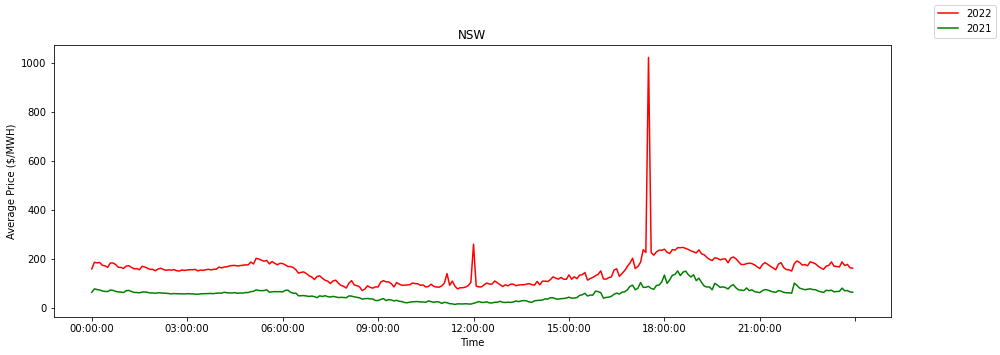

In [17]:
# Plot the average prices during Oct 2021 Vs. 2022
x = Avg_OCT_22['TIME'].astype(str)
y = Avg_OCT_22['RRP']
z = Avg_OCT_21['RRP']



fig,ax = plt.subplots(figsize=(15,5))
ax.plot(x, y, color='r', label= '2022')
ax.plot(x, z, color='g', label= '2021')
loc = plticker.MultipleLocator(base=36.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel("Time")
ax.set_ylabel("Average Price ($/MWH)")

plt.title('NSW')
fig.legend (loc=1)
plt.show()

Apart from the peak in prices in Oct 2022 which could be due to generator outages (Needs to be explored), the average prices have been increased almost constantly throughout the day when comparing 2022 with 2021.

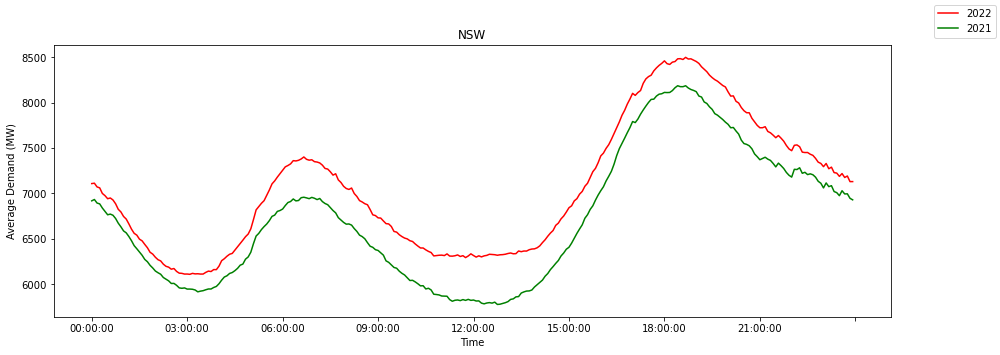

In [18]:
# Plot the average demand during Oct 2021 Vs. 2022

x = Avg_OCT_22['TIME'].astype(str)
y = Avg_OCT_22['TOTALDEMAND']
z = Avg_OCT_21['TOTALDEMAND']


fig,ax = plt.subplots(figsize=(15,5))
ax.plot(x, y, color='r', label= '2022')
ax.plot(x, z, color='g', label= '2021')
loc = plticker.MultipleLocator(base=36.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel("Time")
ax.set_ylabel("Average Demand (MW)")

plt.title('NSW')
fig.legend (loc=1)
plt.show()

The average demand has increased throughout the day when comparing 2022 with 2021 specially during the mid-day.
Their differenced is also shown in the below 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


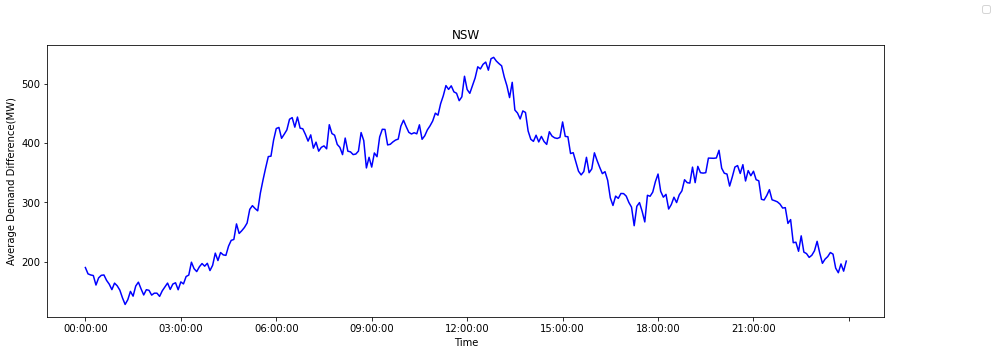

In [19]:
# Plot the average demand difference of Oct 2021 and 2022

x = Avg_OCT_22['TIME'].astype(str)
y = Avg_OCT_22['TOTALDEMAND']
z = Avg_OCT_21['TOTALDEMAND']


fig,ax = plt.subplots(figsize=(15,5))
ax.plot(x, (y-z), color='b')

loc = plticker.MultipleLocator(base=36.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlabel("Time")
ax.set_ylabel("Average Demand Difference(MW)")

plt.title('NSW')
fig.legend (loc=1)
plt.show()